In [313]:
# pip install imbalanced-learn


In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [171]:
# Change display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [172]:
filename = 'kickstarter_data_full.csv'
df = pd.read_csv(filename)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [173]:
df.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,True,1/23/2015 10:35,1/23/2015 10:35,11/29/2014 22:55,12/17/2014 13:47,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,True,5/1/2015 16:13,5/1/2015 16:13,2/20/2015 9:28,3/2/2015 16:13,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,4.0,4.0,23.0,15.0,Friday,Friday,Friday,Monday,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,True,3/26/2015 8:17,3/26/2015 8:17,1/24/2015 0:08,1/25/2015 8:17,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,8.0,8.0,18.0,10.0,Thursday,Thursday,Saturday,Sunday,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,True,10/6/2014 0:41,10/6/2014 0:41,9/5/2014 22:30,9/6/2014 0:41,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"

In [174]:
df.shape

(20632, 68)

In [175]:
# # Get the second column of each DataFrame
# column1 = df.iloc[:, 1]
# # column2 = df2.iloc[:, 1]

# # Compare the columns and print the result
# if column1.equals(column2):
#     print("The second columns of both datasets are the same.")
# else:
#     print("The second columns of both datasets are not the same.")
    
# #both  datasets have same ids

In [176]:
df = df.drop(columns=['Unnamed: 0'])

In [177]:
# Check the number of null values
null_counts = df.isnull().sum()

# Print null counts for each column
for column, count in null_counts.items():
    print(f"{column}: {count}")

id: 0
photo: 0
name: 0
blurb: 5
goal: 0
pledged: 0
state: 0
slug: 0
disable_communication: 0
country: 0
currency: 0
currency_symbol: 0
currency_trailing_code: 0
deadline: 0
state_changed_at: 0
created_at: 0
launched_at: 0
staff_pick: 0
backers_count: 0
static_usd_rate: 0
usd_pledged: 0
creator: 0
location: 45
category: 1889
profile: 0
spotlight: 0
urls: 0
source_url: 0
friends: 20572
is_starred: 20572
is_backing: 20572
permissions: 20572
name_len: 5
name_len_clean: 5
blurb_len: 5
blurb_len_clean: 5
deadline_weekday: 0
state_changed_at_weekday: 0
created_at_weekday: 0
launched_at_weekday: 0
deadline_month: 0
deadline_day: 0
deadline_yr: 0
deadline_hr: 0
state_changed_at_month: 0
state_changed_at_day: 0
state_changed_at_yr: 0
state_changed_at_hr: 0
created_at_month: 0
created_at_day: 0
created_at_yr: 0
created_at_hr: 0
launched_at_month: 0
launched_at_day: 0
launched_at_yr: 0
launched_at_hr: 0
create_to_launch: 0
launch_to_deadline: 0
launch_to_state_change: 0
create_to_launch_days: 0
la

Text(0.5, 1.0, 'Count of Missing Values in Dataset')

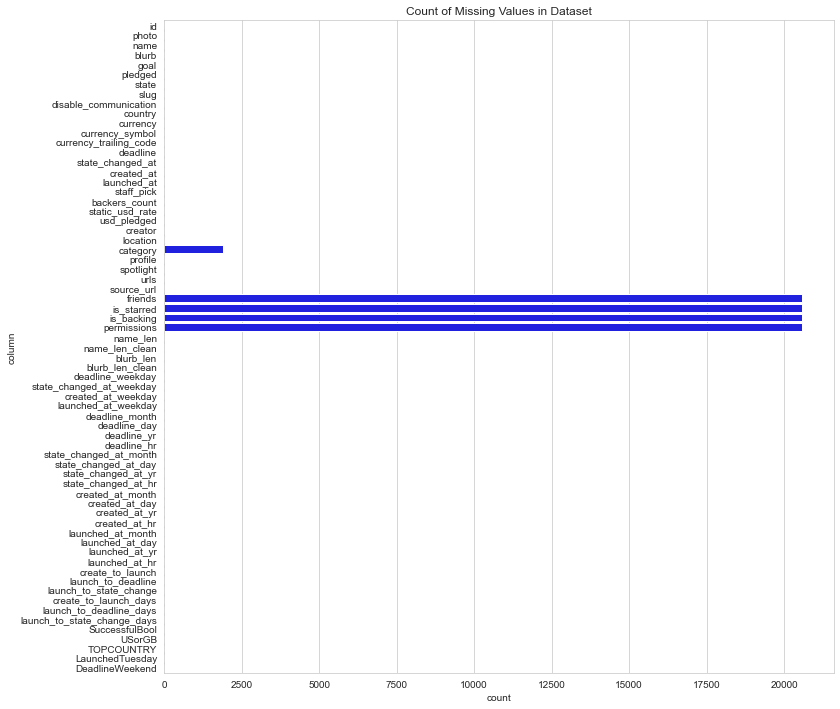

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Count the number of missing values in each column
null_counts = df.isnull().sum()


# Create a dataframe with the column names and missing value counts
null_df = pd.DataFrame({'column': null_counts.index, 'count': null_counts.values if null_counts.any() else []})

# Create the count plot
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
sns.barplot(x='count', y='column', data=null_df, color='blue')
plt.title('Count of Missing Values in Dataset')



In [179]:
# Drop the specified columns
df = df.drop(columns=['friends', 'is_starred', 'is_backing', 'permissions'])

In [180]:
df=df.dropna()

In [181]:
df2= df.copy()

In [182]:
dtypes=df.dtypes

for column,count in dtypes.items():
    print(f"{column}: {count}")

id: int64
photo: object
name: object
blurb: object
goal: float64
pledged: float64
state: object
slug: object
disable_communication: bool
country: object
currency: object
currency_symbol: object
currency_trailing_code: bool
deadline: object
state_changed_at: object
created_at: object
launched_at: object
staff_pick: bool
backers_count: int64
static_usd_rate: float64
usd_pledged: float64
creator: object
location: object
category: object
profile: object
spotlight: bool
urls: object
source_url: object
name_len: float64
name_len_clean: float64
blurb_len: float64
blurb_len_clean: float64
deadline_weekday: object
state_changed_at_weekday: object
created_at_weekday: object
launched_at_weekday: object
deadline_month: int64
deadline_day: int64
deadline_yr: int64
deadline_hr: int64
state_changed_at_month: int64
state_changed_at_day: int64
state_changed_at_yr: int64
state_changed_at_hr: int64
created_at_month: int64
created_at_day: int64
created_at_yr: int64
created_at_hr: int64
launched_at_month: 

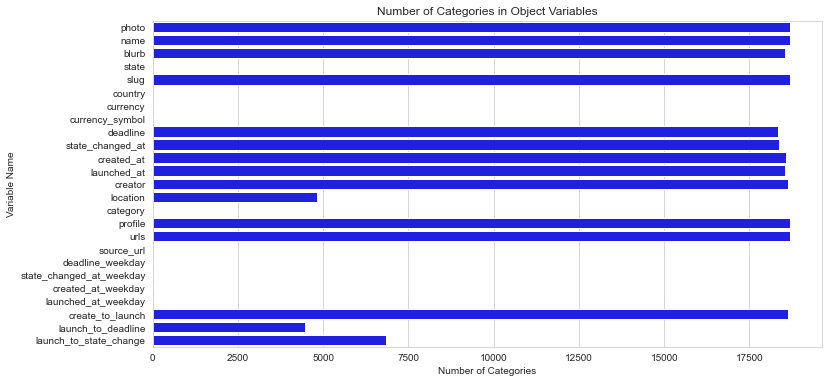

In [185]:
# Select only the object columns
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

# Count the number of unique values in each object column
num_cats = [df[col].nunique() for col in obj_cols]

# Create a dataframe with the column names and number of categories
cat_df = pd.DataFrame({'column': obj_cols, 'num_cats': num_cats})

# Create the count plot
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='num_cats', y='column', data=cat_df, color='blue')
plt.title('Number of Categories in Object Variables')
plt.xlabel('Number of Categories')
plt.ylabel('Variable Name')
plt.show()

In [186]:

# Select only the object columns
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the number of unique values in each object column
for col in obj_cols:
    print(col + ':', df[col].nunique())


photo: 18696
name: 18677
blurb: 18552
state: 5
slug: 18696
country: 21
currency: 13
currency_symbol: 5
deadline: 18344
state_changed_at: 18361
created_at: 18576
launched_at: 18542
creator: 18630
location: 4810
category: 24
profile: 18696
urls: 18696
source_url: 24
deadline_weekday: 7
state_changed_at_weekday: 7
created_at_weekday: 7
launched_at_weekday: 7
create_to_launch: 18629
launch_to_deadline: 4469
launch_to_state_change: 6832


In [187]:
df = df.drop(['photo', 'name', 'blurb', 'slug', 'deadline', 'state_changed_at',
              'created_at', 'launched_at', 'creator', 'profile', 'urls', 'create_to_launch', 
              'launch_to_deadline', 'launch_to_state_change'], axis=1)


In [189]:
df = df.drop(['location', 'category', 'source_url'], axis=1)


In [190]:

# Select only the object columns
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the number of unique values in each object column
for col in obj_cols:
    print(col + ':', df[col].nunique())


state: 5
country: 21
currency: 13
currency_symbol: 5
deadline_weekday: 7
state_changed_at_weekday: 7
created_at_weekday: 7
launched_at_weekday: 7


In [191]:
# Create a label encoder object
le = LabelEncoder()


In [192]:

# Fit and transform the "state" column
df["state"] = le.fit_transform(df["state"])
df["currency"] = le.fit_transform(df["currency"])
df["currency_symbol"] = le.fit_transform(df["currency_symbol"])
df["deadline_weekday"] = le.fit_transform(df["deadline_weekday"])
df["state_changed_at_weekday"] = le.fit_transform(df["state_changed_at_weekday"])
df["created_at_weekday"] = le.fit_transform(df["created_at_weekday"])
df["launched_at_weekday"] = le.fit_transform(df["launched_at_weekday"])

In [193]:
dtypes=df.dtypes

for column,count in dtypes.items():
    print(f"{column}: {count}")

id: int64
goal: float64
pledged: float64
state: int64
disable_communication: bool
country: object
currency: int64
currency_symbol: int64
currency_trailing_code: bool
staff_pick: bool
backers_count: int64
static_usd_rate: float64
usd_pledged: float64
spotlight: bool
name_len: float64
name_len_clean: float64
blurb_len: float64
blurb_len_clean: float64
deadline_weekday: int64
state_changed_at_weekday: int64
created_at_weekday: int64
launched_at_weekday: int64
deadline_month: int64
deadline_day: int64
deadline_yr: int64
deadline_hr: int64
state_changed_at_month: int64
state_changed_at_day: int64
state_changed_at_yr: int64
state_changed_at_hr: int64
created_at_month: int64
created_at_day: int64
created_at_yr: int64
created_at_hr: int64
launched_at_month: int64
launched_at_day: int64
launched_at_yr: int64
launched_at_hr: int64
create_to_launch_days: int64
launch_to_deadline_days: int64
launch_to_state_change_days: int64
SuccessfulBool: int64
USorGB: int64
TOPCOUNTRY: int64
LaunchedTuesday: i

In [195]:

# Select only the object columns
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the number of unique values in each object column
for col in obj_cols:
    print(col + ':', df[col].nunique())


country: 21


In [196]:
df.columns

Index(['id', 'goal', 'pledged', 'state', 'disable_communication', 'country',
       'currency', 'currency_symbol', 'currency_trailing_code', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight',
       'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean',
       'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday',
       'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr',
       'deadline_hr', 'state_changed_at_month', 'state_changed_at_day',
       'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month',
       'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'SuccessfulBool', 'USorGB', 'TOPCOUNTRY',
       'LaunchedTuesday', 'DeadlineWeekend'],
      dtype='object')

In [197]:
# Get the columns with dtype "object"
object_cols = df.select_dtypes(include=["object"]).columns

# Drop the object columns
df = df.drop(object_cols, axis=1)


In [198]:
dtypes=df.dtypes

for column,count in dtypes.items():
    print(f"{column}: {count}")

id: int64
goal: float64
pledged: float64
state: int64
disable_communication: bool
currency: int64
currency_symbol: int64
currency_trailing_code: bool
staff_pick: bool
backers_count: int64
static_usd_rate: float64
usd_pledged: float64
spotlight: bool
name_len: float64
name_len_clean: float64
blurb_len: float64
blurb_len_clean: float64
deadline_weekday: int64
state_changed_at_weekday: int64
created_at_weekday: int64
launched_at_weekday: int64
deadline_month: int64
deadline_day: int64
deadline_yr: int64
deadline_hr: int64
state_changed_at_month: int64
state_changed_at_day: int64
state_changed_at_yr: int64
state_changed_at_hr: int64
created_at_month: int64
created_at_day: int64
created_at_yr: int64
created_at_hr: int64
launched_at_month: int64
launched_at_day: int64
launched_at_yr: int64
launched_at_hr: int64
create_to_launch_days: int64
launch_to_deadline_days: int64
launch_to_state_change_days: int64
SuccessfulBool: int64
USorGB: int64
TOPCOUNTRY: int64
LaunchedTuesday: int64
DeadlineWee

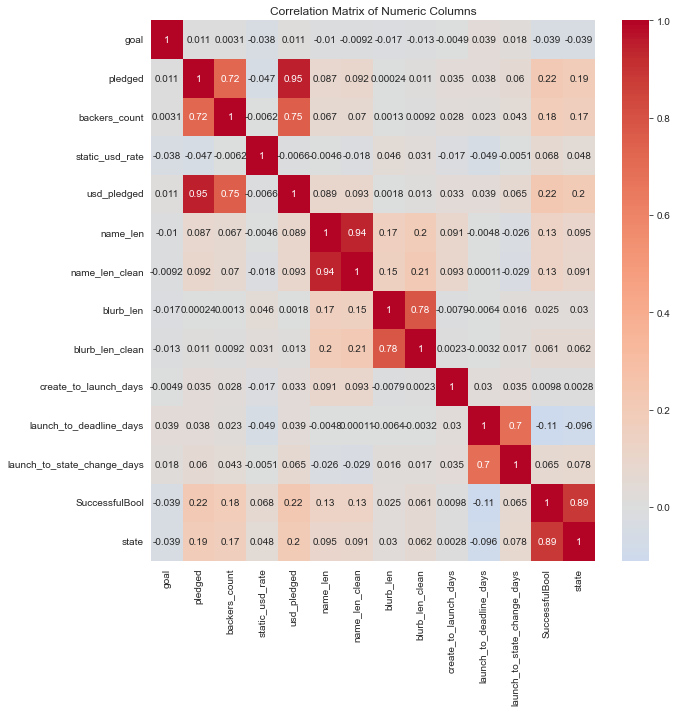

In [199]:
plt.figure(figsize=(10, 10))
# Select the numeric columns
numeric_cols = ['goal', 'pledged', 'backers_count', 'static_usd_rate', 'usd_pledged', 
                'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 
                'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days','SuccessfulBool','state']

# Calculate the correlation matrix
corr = df[numeric_cols].corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

# Add title and adjust layout
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()

# Show the plot
plt.show()


In [200]:
df=df.drop(['id'], axis=1)

In [210]:
# Using random forest
# Assuming your data is stored in a Pandas DataFrame called "df"


# X = df.drop(['state',], axis=1)
X = df[['SuccessfulBool','launch_to_state_change_days','launch_to_deadline_days',
        'launched_at_yr','launched_at_weekday','disable_communication','goal', 'pledged',
        'backers_count', 'static_usd_rate', 'usd_pledged']]
y = df['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9294117647058824


In [211]:
df4=df.copy()

In [212]:
# Assuming your data is stored in a Pandas DataFrame called "df"
X = df4.drop(['state'], axis=1)
y = df4['state']

oversampler = SMOTE(random_state=42,sampling_strategy='minority')

# Resample the data using SMOTE
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the number of samples in each class after resampling
print("Counts after resampling:\n", y_resampled.value_counts())

# Create a new DataFrame with the resampled data
resampled_df2 = pd.concat([X_resampled, y_resampled], axis=1)

Counts after resampling:
 1    10541
4    10541
3     5210
0     2273
2      465
Name: state, dtype: int64


In [213]:
# # Using random forest
# # Assuming your data is stored in a Pandas DataFrame called "df"
# # X = df.drop(['state',], axis=1)

# X = resampled_df2[['SuccessfulBool','launch_to_state_change_days','launch_to_deadline_days',
#         'launched_at_yr','launched_at_weekday','disable_communication']]
# y = resampled_df2['state']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Create a random forest classifier with 100 trees
# # clf = RandomForestClassifier(n_estimators=200,max_depth=4, random_state=42)
# clf = RandomForestClassifier(n_estimators=200,
#                               max_depth=4,
#                               random_state=42)
# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Calculate the accuracy of the predictions
# accuracy = accuracy_score(y_test, y_pred)

# print('Accuracy:', accuracy)

In [255]:
# PCA on preprocessed dataset with random classifier

# Load data and split into train and test sets
X = df[['SuccessfulBool','launch_to_state_change_days','launch_to_deadline_days',
        'launched_at_yr','launched_at_weekday','disable_communication','goal', 'pledged',
        'backers_count', 'static_usd_rate', 'usd_pledged']]
# X=df.drop('state', axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Select the features corresponding to the retained principal components
# Determine the number of principal components to retain
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.9) + 6

selected_features = X.iloc[:, :num_components]

# Train a random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca, y_train)

# Evaluate the model on the test set
accuracy = rfc.score(X_test_pca, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9451871657754011


In [256]:
selected_features

,SuccessfulBool,launch_to_state_change_days,launch_to_deadline_days,launched_at_yr,launched_at_weekday,disable_communication
0,0,36,36,2014,6,False
1,0,60,60,2015,1,False
2,0,60,60,2015,3,False
3,0,30,30,2014,2,False
4,0,32,32,2016,4,False
...,...,...,...,...,...,...
20627,0,31,31,2015,6,False
20628,0,30,30,2016,5,False
20629,0,60,60,2015,0,False
20630,0,30,30,2015,1,False


In [257]:
pca.explained_variance_ratio_

array([0.2487519 , 0.15705112, 0.10702438, 0.09226488, 0.09108389,
       0.08823557])

In [258]:
cumulative_variance_ratio

array([0.2487519 , 0.40580302, 0.5128274 , 0.60509228, 0.69617617,
       0.78441174])

In [259]:
num_components

6

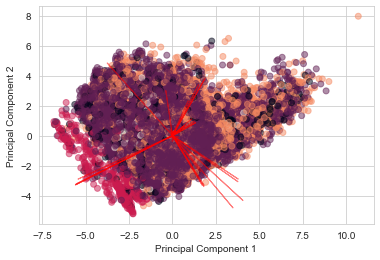

In [35]:
# Load the data
df = df.copy()

# Separate the features and the target variable
X = df.drop('state', axis=1)
y = df['state']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Transform the data onto the first two principal components
X_reduced = pca.transform(X_scaled)[:, :2]

# Visualize the reduced-dimensional data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.5)

# Plot arrows representing the variables
# The length and direction of each arrow represents the contribution of the variable to the corresponding principal component
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i]*15, pca.components_[1, i]*15, color='r', alpha=0.5)
#     print(plt.text(pca.components_[0, i]*3.5, pca.components_[1, i]*3.5, var, color='r', ha='center', va='center'))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [36]:
 X_reduced[:, 1]

array([-0.7169771 , -1.84994934, -1.06282937, ..., -1.69753892,
       -2.05406093,  5.49317734])

In [37]:
len(X_reduced)

18696

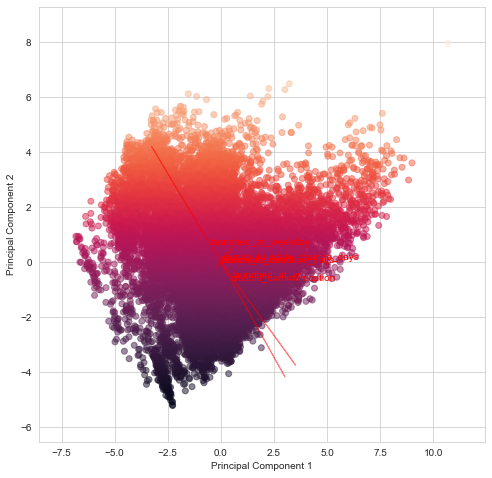

In [38]:
# Biplot of the first two principal components
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the observations
x = X_reduced[:, 0]
y = X_reduced[:, 1]
ax.scatter(x, y, c=y, alpha=0.5)


for i, var in enumerate(selected_features.columns):
    ax.arrow(0, 0, pca.components_[0, i]*13, pca.components_[1, i]*13, color='r', alpha=0.5)
    ax.annotate(var, (pca.components_[0, i]*2, pca.components_[1, i]*2), color='r')

# Set axis limits
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
ax.set_xlim(xmin - 0.1*(xmax - xmin), xmax + 0.1*(xmax - xmin))
ax.set_ylim(ymin - 0.1*(ymax - ymin), ymax + 0.1*(ymax - ymin))

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()


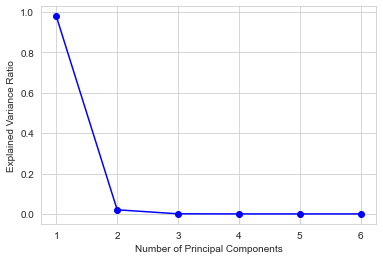

In [261]:
pca = PCA(n_components=6)
pca.fit(X)

fig, ax = plt.subplots()

# Plot the explained variance ratio for each principal component
ax.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [41]:
# after PCA do random classifier

X = resampled_df2[['SuccessfulBool','launch_to_state_change_days','launch_to_deadline_days',
        'launched_at_yr','launched_at_weekday','disable_communication']]
y = resampled_df2['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a random forest classifier with 100 trees
# clf = RandomForestClassifier(n_estimators=200,max_depth=4, random_state=42)
clf = RandomForestClassifier(n_estimators=200,
                              max_depth=4,
                              random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9707199448846021



The feature importances in scikit-learn's random forest classifier are calculated based on the decrease in impurity (i.e., Gini impurity or entropy) resulting from splitting on a particular feature.

During training, the decision tree algorithm evaluates various splitting points in each feature to determine which splits best separate the classes. Features that are able to split the data more effectively (i.e., reduce impurity more) are assigned higher importance scores. These scores are then normalized such that they sum to 1.0, and represent the proportional contribution of each feature to the overall classification accuracy of the model.

In a random forest, the feature importances are averaged across all of the decision trees in the forest to produce an overall estimate of feature importance.

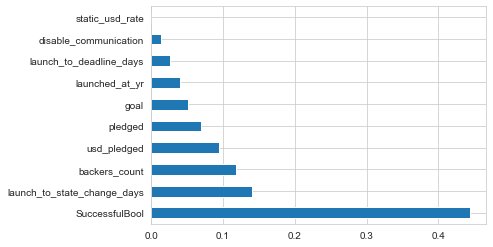

In [262]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# clf.feature_importances_ returns the feature importance scores computed during training of the 
# RandomForestClassifier model. These scores indicate the relative importance of each feature in the model's
# predictions, with higher scores indicating greater importance.

In [43]:
#pip install graphviz


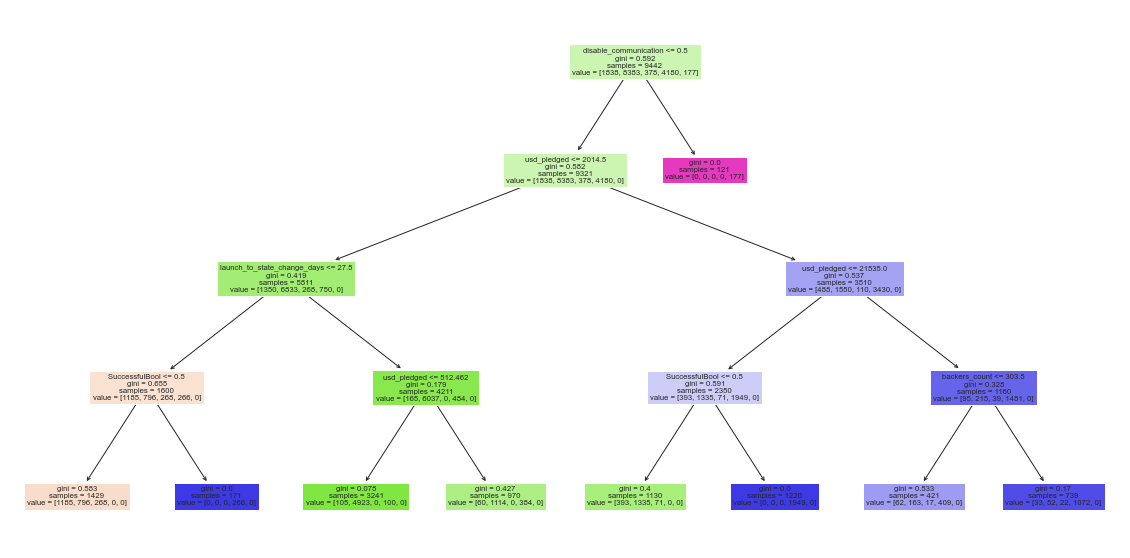

In [263]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()



In [264]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[ 210  221    5    0    0]
 [   0 2140    0    0    0]
 [   7    1   81    0    0]
 [   0    0    0 1037    0]
 [  18   12    0    0    8]]


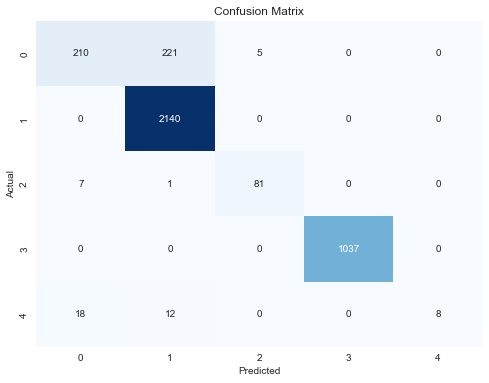

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [162]:
# PCA 2.0

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Create a random forest classifier with 100 trees
# clf = RandomForestClassifier(n_estimators=200,max_depth=4, random_state=42)
clf = RandomForestClassifier(n_estimators=200,
                              max_depth=4,
                              random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8


In [155]:
# Using random forest only

X = df.drop(['state'], axis=1)
y = df['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=4)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8711229946524064


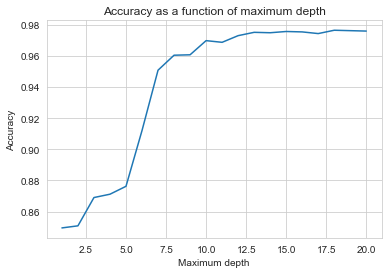

In [156]:
# RF algorithm accuracy as a function of depth
X = df.drop(['state'], axis=1)
y = df['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 21)
accuracies = []

for depth in depths:
    # Create a random forest classifier with 100 trees and the current depth
    clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=depth)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(depths, accuracies)
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of ')
plt.show()


In [542]:
df3=df.copy()


In [543]:
df3.shape

(18696, 44)

In [544]:
df3['state'].value_counts()

1    10541
3     5210
0     2273
2      465
4      207
Name: state, dtype: int64

In [124]:
# Assuming your data is stored in a Pandas DataFrame called "df"
X = df3.drop(['state'], axis=1)
y = df3['state']

# Create a SMOTE object
oversampler = SMOTE(random_state=42,sampling_strategy='minority')

# Resample the data using SMOTE
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the number of samples in each class after resampling
print("Counts after resampling:\n", y_resampled.value_counts())


# Create a new DataFrame with the resampled data
resampled_df1 = pd.concat([X_resampled, y_resampled], axis=1)

Counts after resampling:
 4    10564
1    10541
3     5210
0     2273
2      465
Name: state, dtype: int64


<ipython-input-125-cd38bd428eda>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


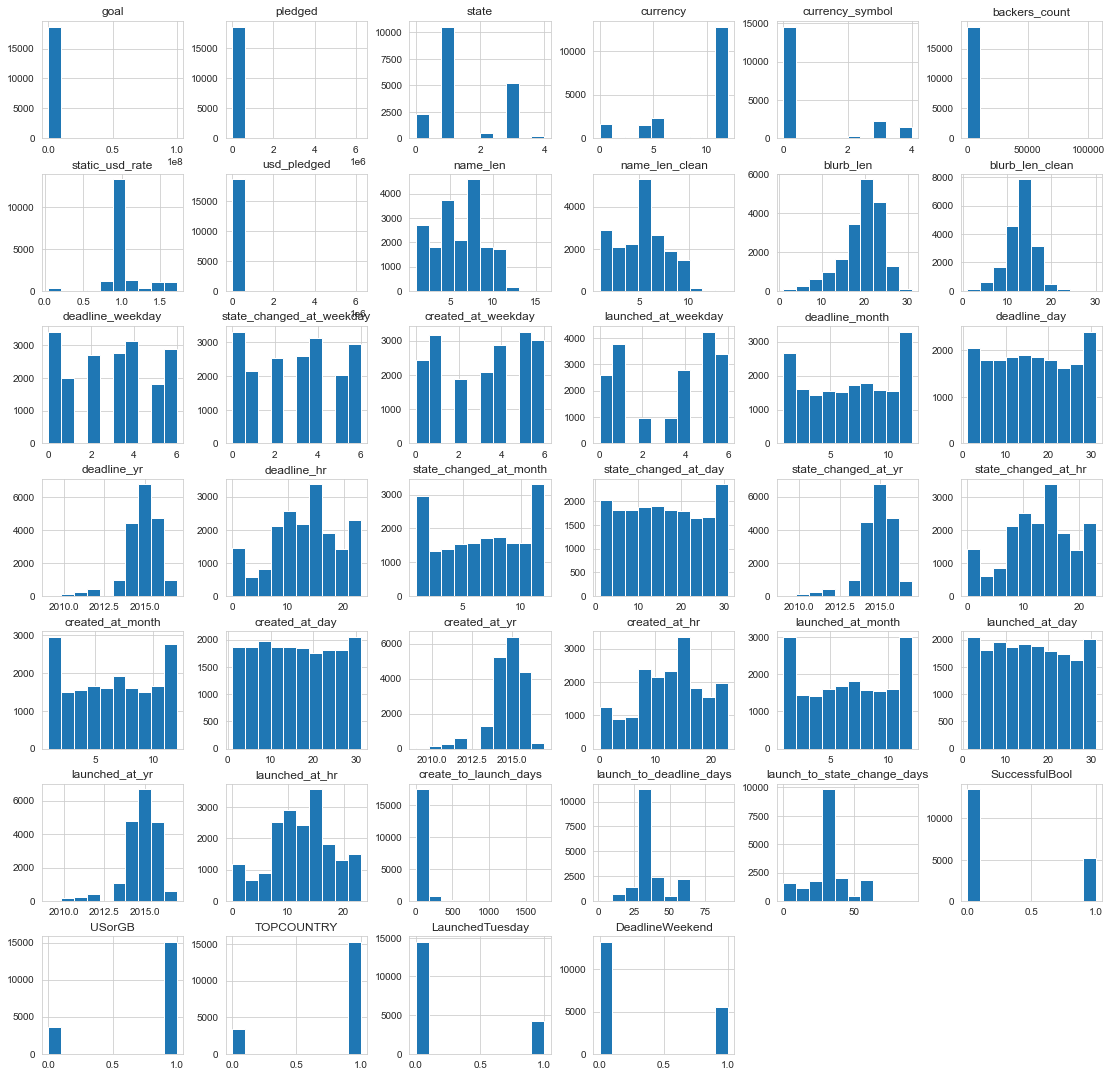

In [125]:
# Plot a histogram of the original data
# Plot a histogram of the resampled data
# Plot a histogram of the resampled data
fig, ax = plt.subplots(figsize=(19,19))
df.hist(ax=ax)
ax.set_title("Resampled Data Histogram", color='black', fontsize=20)

plt.show()

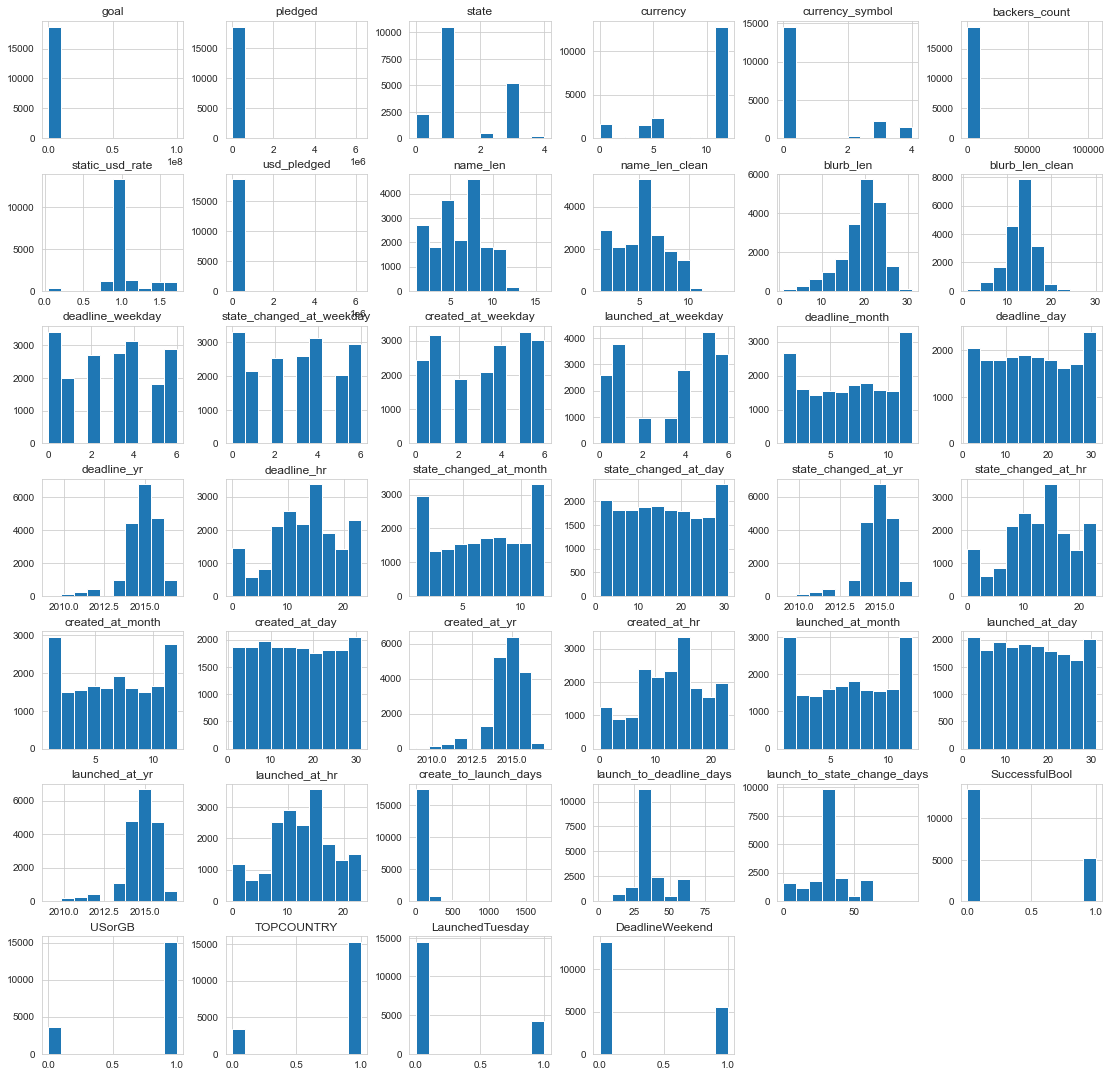

In [126]:
# Plot a histogram of the resampled data


# Plot a histogram of the resampled data
df.hist(figsize=(19,19))
plt.show()


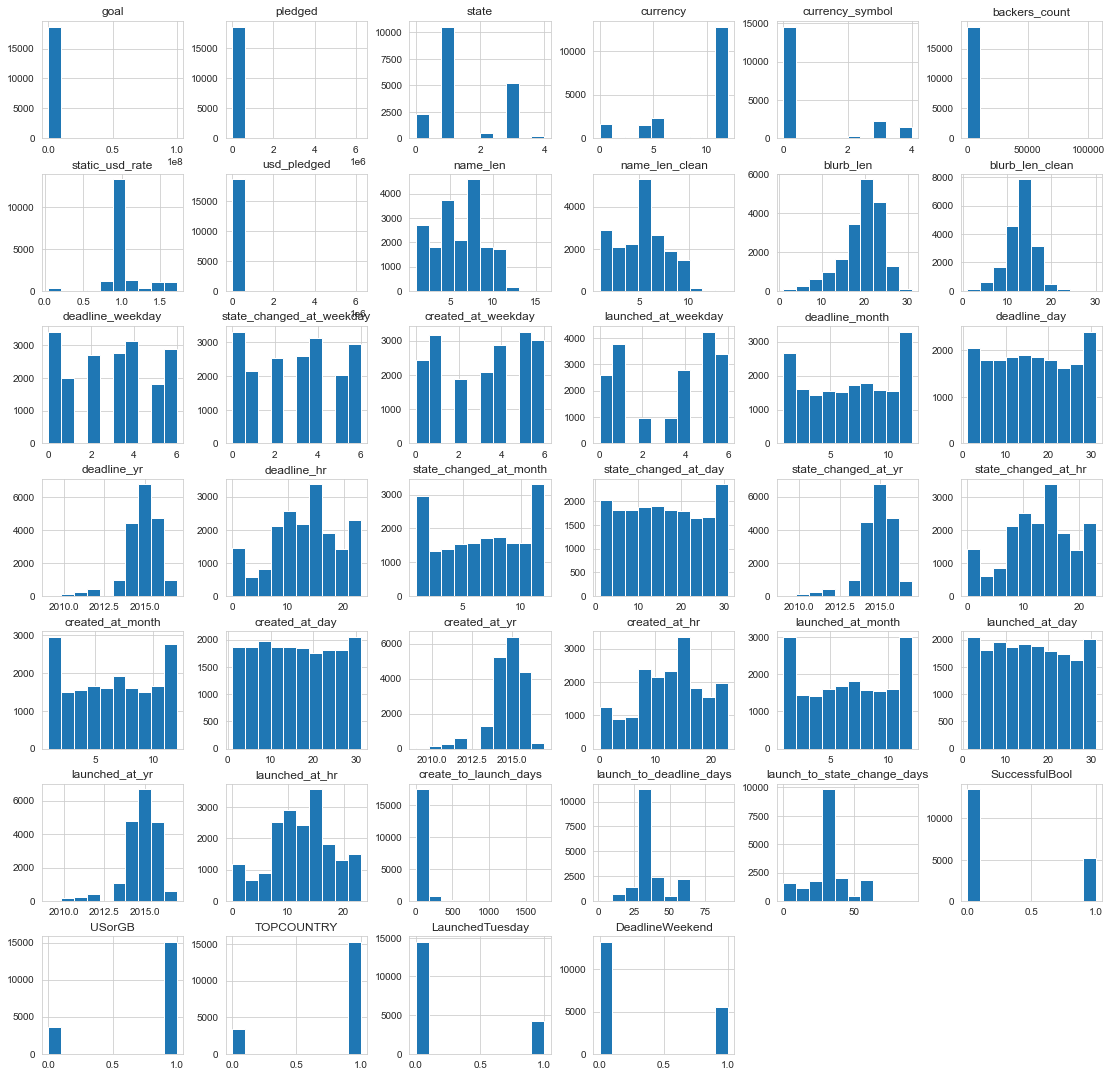

In [127]:
# Plot a histogram of the resampled data


# Plot a histogram of the resampled data
df.hist(figsize=(19,19))
plt.show()


<AxesSubplot:xlabel='state', ylabel='count'>

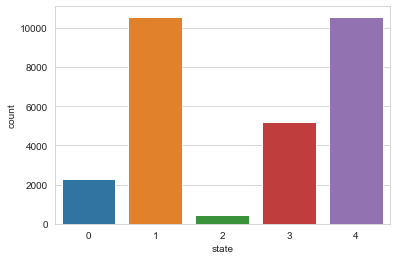

In [128]:
# Plot a countplot of the target variable in the resampled data
sns.countplot(data=resampled_df1, x='state')

In [150]:
# Accuracy using SMOTE
# Load the data
df_a = df.copy()

# Separate the features and the target variable
X = df_a.drop('state', axis=1)
y = df_a['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object
oversampler = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')

# Resample the training data using SMOTE
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Print the number of samples in each class after resampling
print("Counts after resampling:\n", y_resampled.value_counts())

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Create a random forest classifier with hyperparameters tuned to prevent overfitting
clf = RandomForestClassifier(n_estimators=100,
                              max_depth=4,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              max_features=0.2,
                              bootstrap=True,
                              max_samples=None,
                              oob_score=True,
                              ccp_alpha=0.0002,
                              warm_start=True,
                              n_jobs=4,
                              min_impurity_decrease=0.000013,
                              criterion='gini',
                              random_state=42)

# Fit the classifier to the resampled training data
clf.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Counts after resampling:
 0    8401
1    8401
2    8401
3    8401
4    8401
Name: state, dtype: int64
Accuracy: 0.9101604278074866


In [152]:
df_adasyn=df.copy()

# Separate the features and the target variable
X = df_adasyn.drop('state', axis=1)
y = df_adasyn['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ADASYN object
oversampler = ADASYN(random_state=42, n_neighbors=5, sampling_strategy='all')

# Resample the training data using ADASYN
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Print the number of samples in each class after resampling
print("Counts after resampling:\n", y_resampled.value_counts())

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Create a random forest classifier with hyperparameters tuned to prevent overfitting
clf = RandomForestClassifier(n_estimators=100,
                              max_depth=4,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              max_features=0.2,
                              bootstrap=True,
                              max_samples=None,
                              oob_score=True,
                              ccp_alpha=0.0002,
                              warm_start=True,
                              n_jobs=4,
                              min_impurity_decrease=0.000013,
                              criterion='gini',
                              random_state=42)

# Fit the classifier to the resampled training data
clf.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Counts after resampling:
 0    8590
4    8479
3    8422
1    8401
2    8348
Name: state, dtype: int64
Accuracy: 0.9040106951871658


In [130]:
#for adasyn

df4= df.copy()

# Assuming your data is stored in a Pandas DataFrame called "df"
X = df4.drop(['state'], axis=1)
y = df4['state']

# Create an ADASYN object
oversampler = ADASYN(random_state=42,n_neighbors=5, sampling_strategy='all')

# Resample the data using ADASYN
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the number of samples in each class after resampling
print("Counts after resampling:\n", y_resampled.value_counts())

# Create a new DataFrame with the resampled data
resampled_df2 = pd.concat([X_resampled, y_resampled], axis=1)

Counts after resampling:
 3    10677
2    10586
0    10581
4    10564
1    10541
Name: state, dtype: int64


In [553]:
# assuming your dataset is stored in a DataFrame called 'df'
corr_matrix = resampled_df2.corr()

# display the correlation matrix
print(corr_matrix)

# high corr values disable_communication 0.7,spotlight .34 , successfulbool 0.34

                                 goal   pledged  disable_communication  \
goal                         1.000000  0.012336              -0.025553   
pledged                      0.012336  1.000000              -0.027142   
disable_communication       -0.025553 -0.027142               1.000000   
currency                    -0.010486  0.040955              -0.071099   
currency_symbol             -0.001365 -0.053355              -0.050672   
currency_trailing_code       0.013765  0.040558               0.106121   
staff_pick                  -0.011743  0.306574              -0.174676   
backers_count               -0.002608  0.705252               0.023400   
static_usd_rate             -0.053450 -0.090069               0.020375   
usd_pledged                  0.007193  0.929547              -0.023470   
spotlight                   -0.035674  0.247528              -0.250903   
name_len                    -0.016175  0.107788               0.096356   
name_len_clean              -0.012537 

In [518]:
resampled_df2.head()

,goal,pledged,disable_communication,currency,currency_symbol,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,state
0,1500.0,0.0,False,12,0,True,False,0,1.000000,0.000000,False,11.0,9.0,21.0,16.0,0,0,2,6,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17,36,36,0,1,1,0,0,1
1,500.0,0.0,False,12,0,True,False,0,1.000000,0.000000,False,4.0,4.0,23.0,15.0,0,0,0,1,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10,60,60,0,1,1,0,0,1
2,100000.0,120.0,False,12,0,True,False,5,1.000000,120.000000,False,8.0,8.0,18.0,10.0,4,4,2,3,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1,60,60,0,1,1,0,0,1
3,5000.0,0.0,False,12,0,True,False,0,1.000000,0.000000,False,7.0,6.0,21.0,13.0,1,1,0,2,10,6,2014,0,10,6,2014,0,9,5,2014,22,9,6,2014,0,0,30,30,0,1,1,0,0,1
4,3222.0,356.0,False,4,4,False,False,17,1.114613,396.802395,False,7.0,7.0,18.0,18.0,1,1,6,4,6,27,2016,12,6,27,2016,12,5,25,2016,14,5,26,2016,5,0,32,32,0,0,0,0,0,1


In [554]:
resampled_df2.shape

(52949, 44)

In [555]:
dtypes=resampled_df2.dtypes

for column,count in dtypes.items():
    print(f"{column}: {count}")

goal: float64
pledged: float64
disable_communication: bool
currency: int64
currency_symbol: int64
currency_trailing_code: bool
staff_pick: bool
backers_count: int64
static_usd_rate: float64
usd_pledged: float64
spotlight: bool
name_len: float64
name_len_clean: float64
blurb_len: float64
blurb_len_clean: float64
deadline_weekday: int64
state_changed_at_weekday: int64
created_at_weekday: int64
launched_at_weekday: int64
deadline_month: int64
deadline_day: int64
deadline_yr: int64
deadline_hr: int64
state_changed_at_month: int64
state_changed_at_day: int64
state_changed_at_yr: int64
state_changed_at_hr: int64
created_at_month: int64
created_at_day: int64
created_at_yr: int64
created_at_hr: int64
launched_at_month: int64
launched_at_day: int64
launched_at_yr: int64
launched_at_hr: int64
create_to_launch_days: int64
launch_to_deadline_days: int64
launch_to_state_change_days: int64
SuccessfulBool: int64
USorGB: int64
TOPCOUNTRY: int64
LaunchedTuesday: int64
DeadlineWeekend: int64
state: int6

In [157]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [0.2, 0.5, 1]}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              max_features=best_params['max_features'],
                              random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.98475935828877


In [159]:


# Get the predicted labels and the probabilities for the test data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]



# Create a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.87      0.93       436
           1       0.98      1.00      0.99      2140
           2       0.97      1.00      0.98        89
           3       1.00      1.00      1.00      1037
           4       1.00      1.00      1.00        38

    accuracy                           0.98      3740
   macro avg       0.99      0.97      0.98      3740
weighted avg       0.99      0.98      0.98      3740



In [147]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       436
           1       0.95      0.90      0.92      2140
           2       0.75      1.00      0.86        89
           3       1.00      1.00      1.00      1037
           4       1.00      0.97      0.99        38

    accuracy                           0.91      3740
   macro avg       0.86      0.92      0.89      3740
weighted avg       0.92      0.91      0.91      3740



In [148]:
# Check if it's overfitting. Perform CV

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# how do you apply cross validation
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

Cross-validation scores: [0.97433155 0.98609626 0.97914439 0.97593583 0.97272727 0.97486631
 0.97913323 0.96950241 0.976458   0.97431782]
Mean cross-validation score: 0.9762513054251324


In [149]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Get the classification report
report = classification_report(y_test, y_pred)

print(report)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# attempt with df

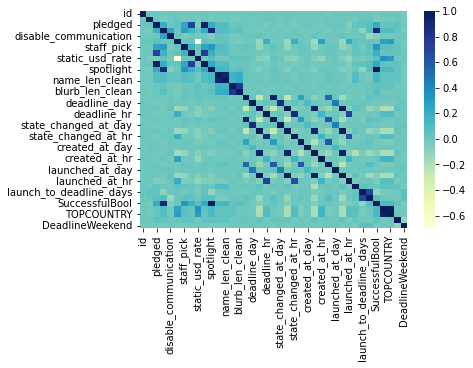

In [19]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Show the plot
plt.show()

In [22]:
# Split the data into training and test sets

# LOGISTIC REGRESSION USING ALL NUMERIC COLUMNS.
X_train, X_test, y_train, y_test = train_test_split(df.drop("state", axis=1), 
                                                    df["state"], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.02%


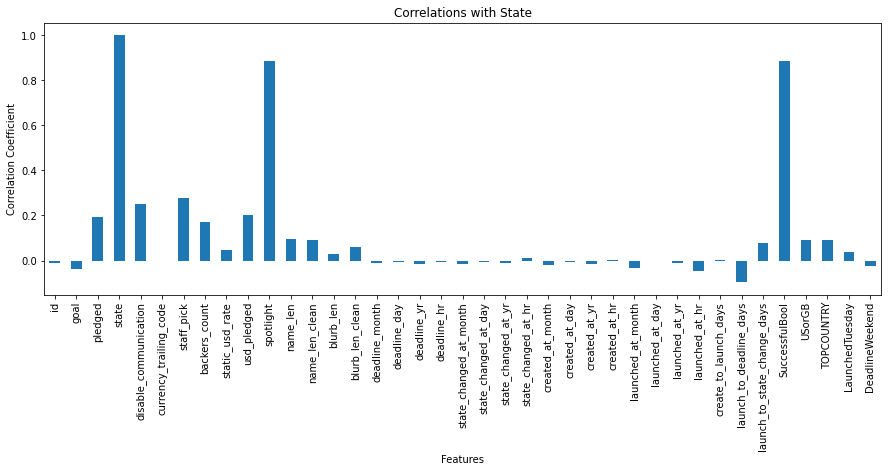

In [25]:
# pairwise correlation
correlations = df.corrwith(df["state"])


correlations.plot(kind="bar", figsize=(15, 5))

# Set plot title and axis labels
plt.title("Correlations with State")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")

# Show the plot
plt.show()


# spotlight,USorGB

In [28]:
# Select columns for X (features) and y (target variable)

# USING ONLY COLUMNS SPOTLIGHT AND USORGB.

X = df[["spotlight", "USorGB","staff_pick","disable_communication"]]
y = df["state"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8596256684491979


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Select columns for X (features) and y (target variable)

# USING ONLY COLUMNS SPOTLIGHT AND USORGB AND NORMALISATION

X = df[["spotlight", "USorGB","staff_pick"]]
y = df["state"]


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8494652406417113


In [65]:
# Select columns for X (features) and y (target variable)

# USING ONLY COLUMNS SPOTLIGHT AND USORGB AND NORMALISATION

X = df[["spotlight", "USorGB"]]
y = df["state"]


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a MLPClassifier object
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

# Create a KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Use cross-validation to evaluate the model
scores = cross_val_score(mlp, X_scaled, y, cv=kf)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.01)
